In [75]:
from config import connection
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot
import numpy as np

In [76]:
# Create a connection to the DB
engine = create_engine(connection)
conn = engine.connect()

In [77]:
# Import the relevant tables
salary = pd.read_sql("SELECT * FROM salary", conn)
employee = pd.read_sql("SELECT * FROM employee", conn) 
title = pd.read_sql("SELECT * FROM title", conn)

Create a histogram to visualize the most common salary ranges for employees.

The maximum salary is: 129492
The minimum salary is: 40000


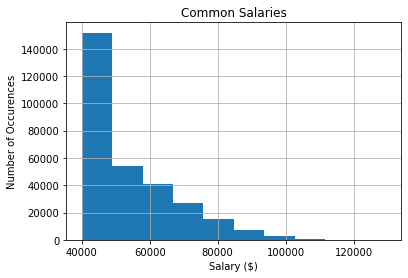

In [78]:
# Investigate the salary range we're working with to make appropriately sized bins
print(f"The maximum salary is: {salary['salary'].max()}")
print(f"The minimum salary is: {salary['salary'].min()}")

# Chart it
hist = salary.hist(column='salary', bins=10)
ax = hist[0]

# Make it pretty
for x in ax:
    x.set_title("Common Salaries")
    x.set_ylabel("Number of Occurences")
    x.set_xlabel("Salary ($)")

Create a bar chart of average salary by title.

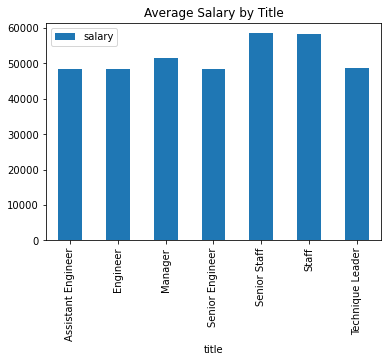

In [79]:
# Merge the tables to get the data we need into one DF
empSalaries = pd.merge(salary, employee, on='empid')
empTitles = pd.merge(empSalaries, title, on='titleid')
empData = empTitles.loc[:,['salary','title']]

# Get averages
empData = empData.groupby('title').mean()

# Chart it
sals = empData.plot(kind='bar',title = 'Average Salary by Title')
sals.set_xlabel='Title'
sals.ylabel='Avg. Salary ($)'